In [2]:
import paho.mqtt.client as mqtt
import mediapipe as mp
import cv2
import time
import pandas as pd
import os



In [3]:

class CameraControl:
    #MQTT methods
    def on_connect(self,client, userdata, flags, rc):
        print("Connected with result code " + str(rc))
        client.subscribe("test/topic")
        client.subscribe("test2/topic")


    def on_message(self,client, userdata, msg):
        if msg.topic == "test/topic":
            print(msg.topic+" "+str(msg.payload))
        elif msg.topic == "test2/topic":
            print("Test2")

    def __init__(self):
        self.client = mqtt.Client()
        self.client.on_connect = self.on_connect
        self.client.on_message = self.on_message

        self.client.connect("localhost", 1883, 60)

    def getRealTimeCamera(self,selectData,maxDatasets):
        mp_drawing = mp.solutions.drawing_utils
        mp_holistic = mp.solutions.holistic
        cap = cv2.VideoCapture(0)
        # Initiate holistic model
        data = []
        dataCounter = 0
        with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
            
            while cap.isOpened() and selectData and dataCounter<maxDatasets:
                ret, frame = cap.read()
                
                # Recolor Feed
                image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                # Make Detections
                results = holistic.process(image)
                # print(results.face_landmarks)
                
                # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
                
                # Recolor image back to BGR for rendering
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
                
                # Draw face landmarks
                #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS)
                
                # Right hand
                mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

                # Left Hand
                mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

                # Pose Detections
                mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

                #print(type(results.left_hand_landmarks))
                print(dataCounter)
                if results.left_hand_landmarks and results.right_hand_landmarks:
                    datasetLeftHand = [i for i in results.left_hand_landmarks.landmark]
                    datasetRightHand = [i for i in results.right_hand_landmarks.landmark]
                    data.append(datasetLeftHand + datasetRightHand)
                    print(datasetLeftHand[0])
                    dataCounter+=1
                os.system('cls')
                
            
                cv2.imshow('Raw Webcam Feed', image)
                

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

        cap.release()
        cv2.destroyAllWindows()
        return data


#camera1.client.loop_forever()


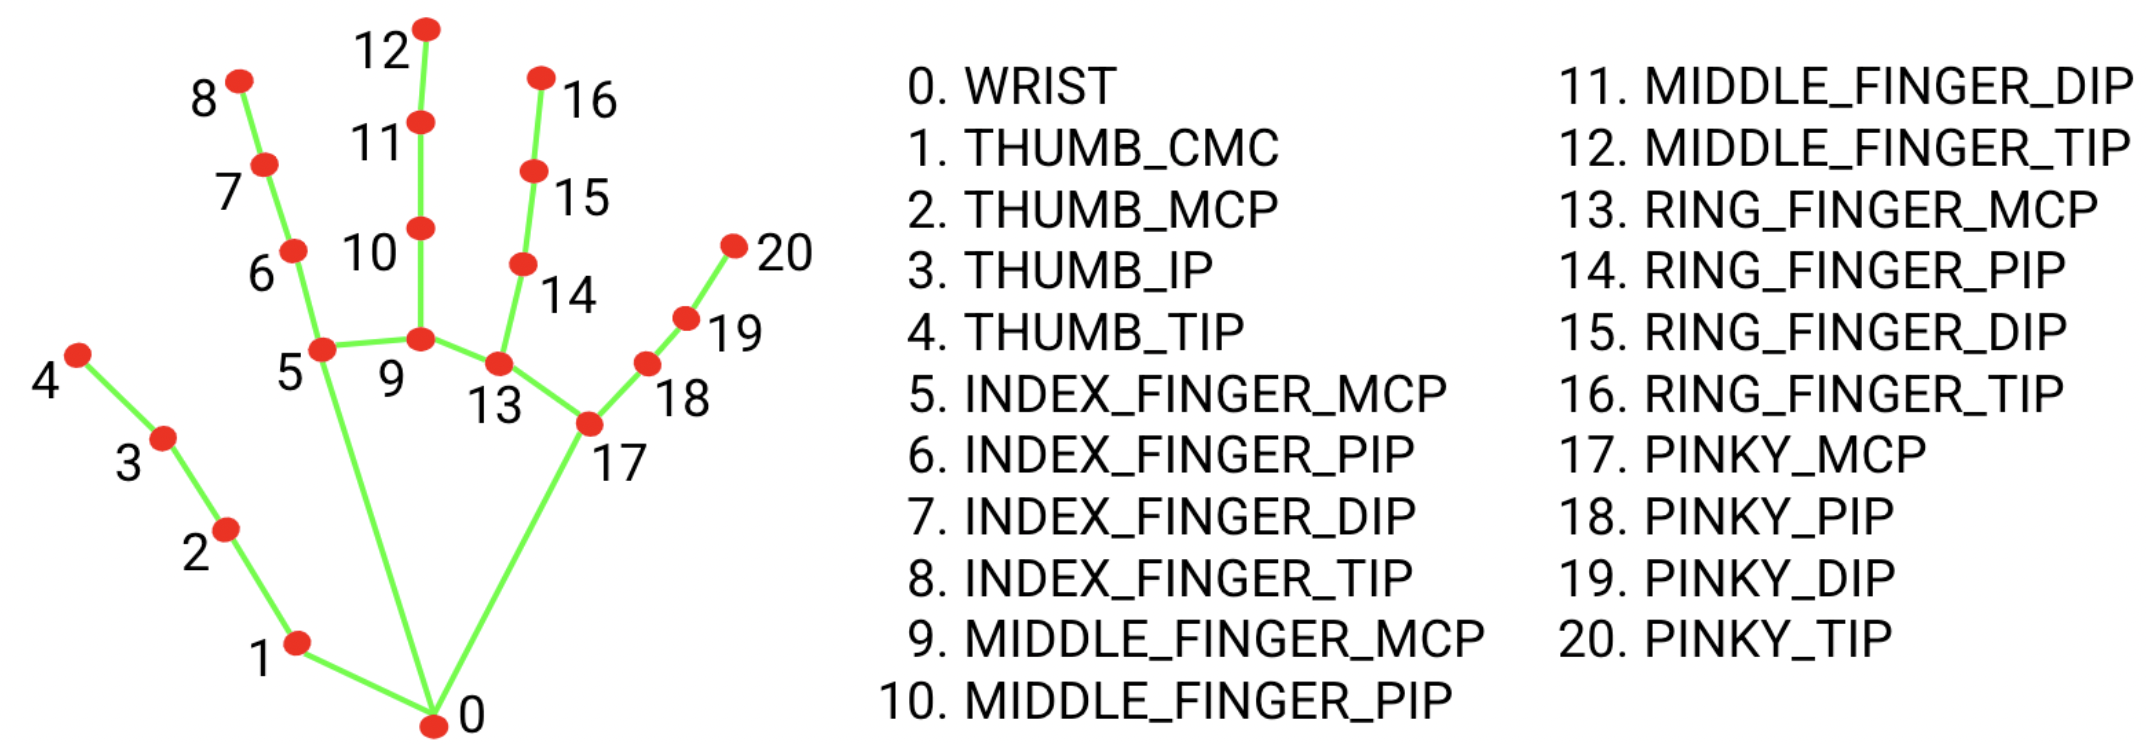

In [25]:
test = data[40]
test[20].x

0.7849754095077515

In [5]:
#collect data
listOfStates = ["screw","nextState","solder"]
columnsData = ["l_wrist","l_thumb_cmc","l_thumb_mcp","l_thumb_ip","l_thumb_tip",
               "l_index_finger_mcp","l_index_finger_pip","l_index_finger_dip","l_index_finger_tip",
               "l_middle_finger_mcp","l_middle_finger_pip","l_middle_finger_dip","l_middle_finger_tip",
               "l_ring_finger_mcp","l_ring_finger_pip","l_ring_finger_dip","l_ring_finger_tip",
               "l_pinky_mcp","l_pinky_pip","l_pinky_dip","l_pinky_tip",
               "r_wrist","r_thumb_cmc","r_thumb_mcp","r_thumb_ip","r_thumb_tip",
               "r_index_finger_mcp","r_index_finger_pip","r_index_finger_dip","r_index_finger_tip",
               "r_middle_finger_mcp","r_middle_finger_pip","r_middle_finger_dip","r_middle_finger_tip",
               "r_ring_finger_mcp","r_ring_finger_pip","r_ring_finger_dip","r_ring_finger_tip",
               "r_pinky_mcp","r_pinky_pip","r_pinky_dip","r_pinky_tip"]
path_out = 'C:\\Users\\Jona\\Documents\\FH\\6-Semester\\Assistenzsysteme\\Projektarbeit\\Assistenzsysteme\\'

columnsDataxyz = []
for i in columnsData:
    columnsDataxyz.append(i+"_x")
    columnsDataxyz.append(i+"_y")
    columnsDataxyz.append(i+"_z")
columnsDataxyz.append("state")

numOfRep = 1
camera1 = CameraControl()
for state in listOfStates:
    data = []
    datasave = []
    for idxRep in range(numOfRep):
        data.append(camera1.getRealTimeCamera(True,200))
        
        for dataset in data[idxRep]:
            datasettmp = []
            for i in dataset:
                print(i)
                datasettmp.append(i.x)
                datasettmp.append(i.y)
                datasettmp.append(i.z)
            datasettmp.append(state)
            datasave.append(datasettmp)

    dfsave = pd.DataFrame(data = datasave,columns=columnsDataxyz)
    dfsave.to_csv(path_out+state+".csv",sep=";",index=False)
    


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
x: 0.7256174683570862
y: 0.9361178278923035
z: 8.243380733574668e-08

1
x: 0.7846834659576416
y: 0.8007569909095764
z: 2.2701283342030365e-07

2
x: 0.8235920071601868
y: 0.6846792697906494
z: 1.4577672402538155e-07

3
x: 0.8977508544921875
y: 0.4334312081336975
z: 5.630849742033206e-08

4
x: 0.8989687561988831
y: 0.3229662775993347
z: 2.3969352724861892e-08

5
x: 0.8979086875915527
y: 0.3121229410171509
z: 1.854881617191495e-07

6
x: 0.8958277702331543
y: 0.28430142998695374
z: 2.401673100393964e-07

7
x: 0.8844591379165649
y: 0.2670438289642334
z: 2.194638852870412e-07

8
x: 0.8445184230804443
y: 0.2497120052576065
z: 1.5464202363091317e-07

9
9
9
9
9
x: 0.47789227962493896
y: 0.187866672873497
z: 1.568041483324123e-07

10
x: 0.47558701038360596
y: 0.20176756381988525
z: 6.483524828126974e-08

11
x: 0.4857226610183716
y: 0.2115529626607895
z: 1.013739350241849e-07

12
x: 0.5130687355995178
y: 0.2253526747226715
z: 1.06208652539

KeyboardInterrupt: 

In [33]:
test = data[0][10]